<div style='background-image: url("https://i.ibb.co/2t6jDtW/igte-tu-banner.png") ; padding: 0px ; background-size: 40% 130% ; background-repeat: no-repeat; border-radius: 5px ; height: 250px'>
<div style="position: absolute; top: 100px; left: 260px; border-radius: 10px; background: rgba(212, 212, 212, 0.6) ; width:600px; height: 150px">
<div style="position: relative; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; padding-top: 5px; padding-left: 130px ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">Optimization I : HW-2</div>
            <div style="font-size: large ; padding-top: 20px ; padding-left: 135px ; color: rgba(0 , 0 , 0 , 0.6)">First and second order methods</div>
            <div style="font-size: small ; padding-top: 5px ; padding-left: 25px ; color: rgba(0 , 0 , 0 , 0.4)">DD.MM.YYYY </div>
                    <div style="font-size: small ; padding-top: 0px ; padding-left: 25px ; color: rgba(0 , 0 , 0 , 0.4)">Group Nr. 05, Haris Felic ( 01609136 ), Benedikt Gasplmayr ( 01530104 ) </div>
        </div>
    </div>
</div>

In [27]:
from typing import Callable, List, Tuple
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt
import test_functions as tf

from HW2_Group5_update import gradient_descent
from HW2_Group5_update import newton
from HW2_Group5_update import levenberg_marquardt
from HW2_Group5_update import gauss_newton

## Task 1 ( Gradient descent ) :


Write your markdown and latex here

Start gradient descent
Starting point at x = [[ 0.75 -1.25]]
Optimum at x = [[0.99891407 0.99782542]]
function calls: 11868
iterations: 1979


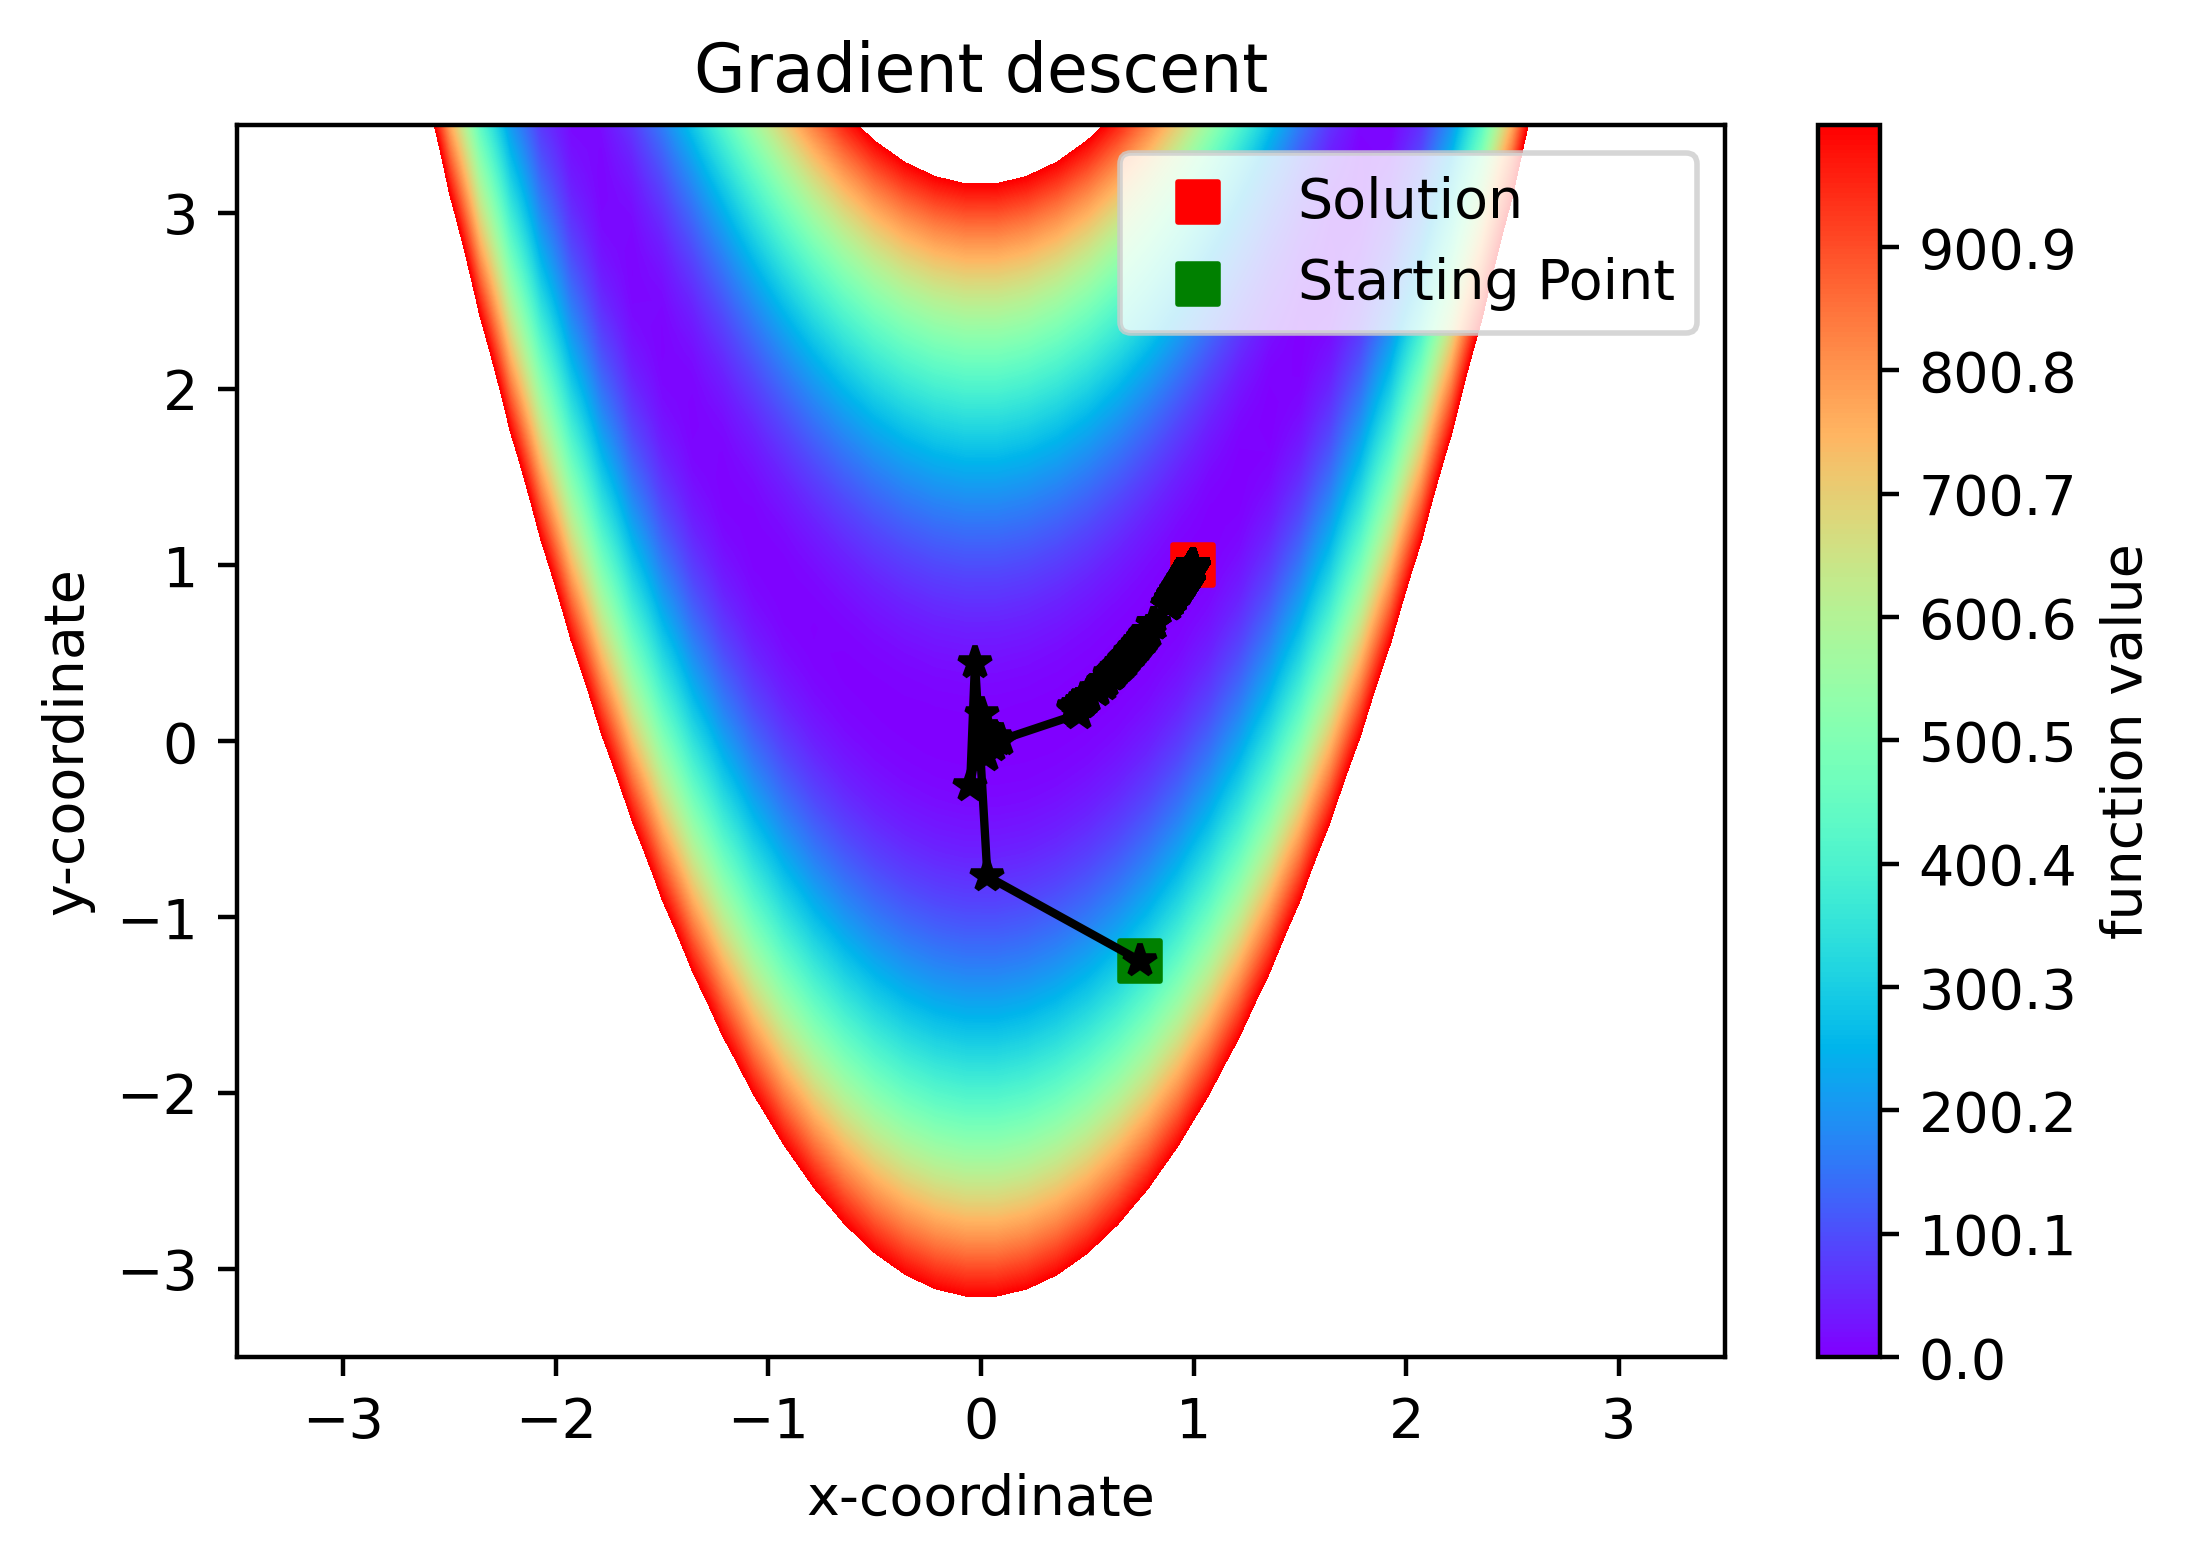

In [9]:
############ CONTROL FUNCTIONS ################ 
print('Start gradient descent')
f,g = tf.test_function(1)[:2]

x0 = np.array([[-2, 0]])
x0 = np.array([[0.75, -1.25]])

x_opt, x_steps, fc, gc = gradient_descent(f=f, g=g, x0=x0,eps = 1e-3, s =2e-4, k = 3)

#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-3.5,3.5,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 1000, 1000), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Gradient descent')

# Plot the search direction
combined_array = np.concatenate(x_steps, axis=0)
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0,0], x_opt[0,1],marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0,0], x0[0,1],marker="s",label="Starting Point",s=50,color='green')

plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("function calls:",fc)
print("iterations:",gc)

## Task 2 ( Newton method ) :


Write your markdown and latex here


Start newton method
Eigenvalues: [1261.76455498  115.23544502]
Convergence reached!
Starting point at x = [[ 0.75 -1.25]]
Optimum at x = [[0.99997817 0.99995635]]
iterations: 4


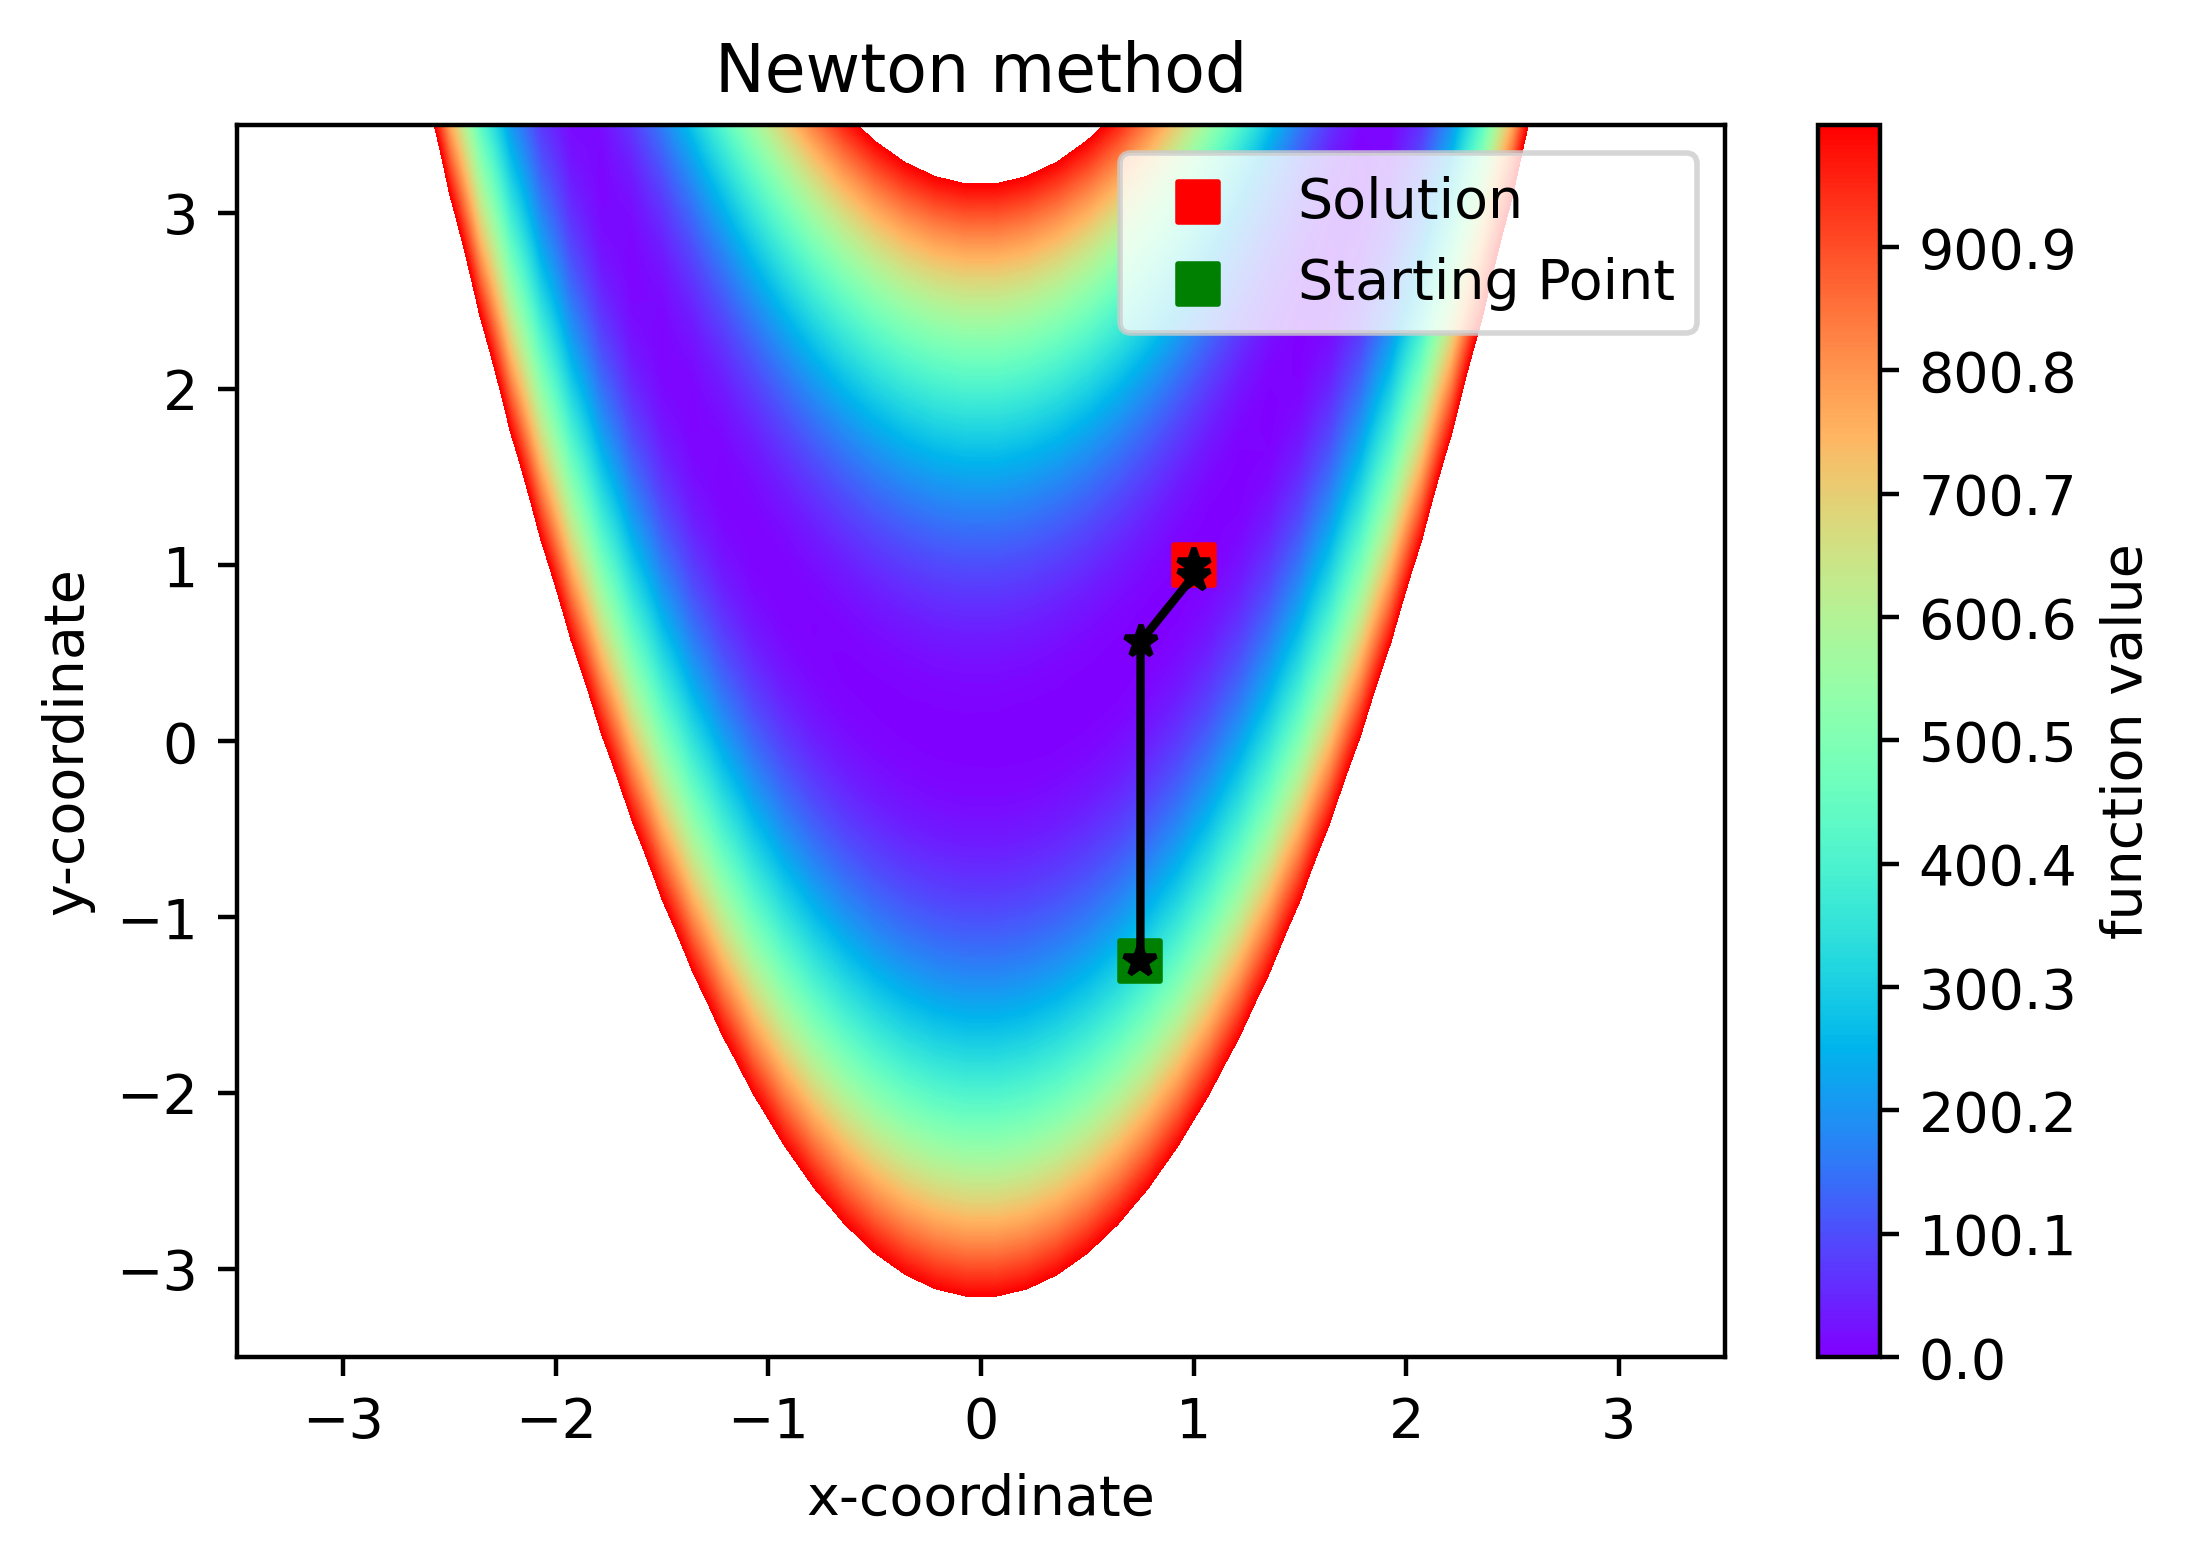

In [10]:
print('\nStart newton method')
f,g,H = tf.test_function(1)[:3]

x0 = np.array([[0.75, -1.25]])

print(f'Eigenvalues: {np.linalg.eigvals(H(x0))}')
x_opt, x_steps, gc = newton(g, H, x0)


#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-3.5,3.5,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 1000, 1000), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Newton method')


# Plot the search direction
combined_array = np.concatenate(x_steps, axis=0)
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0,0], x_opt[0,1],marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0,0], x0[0,1],marker="s",label="Starting Point",s=50,color='green')

plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("iterations:",gc)


Eigenvalues: [-42. -26.]
Convergence reached!
Starting point at x = [[0 0]]
Optimum at x = [[-0.27084639 -0.92302828]]
iterations: 4


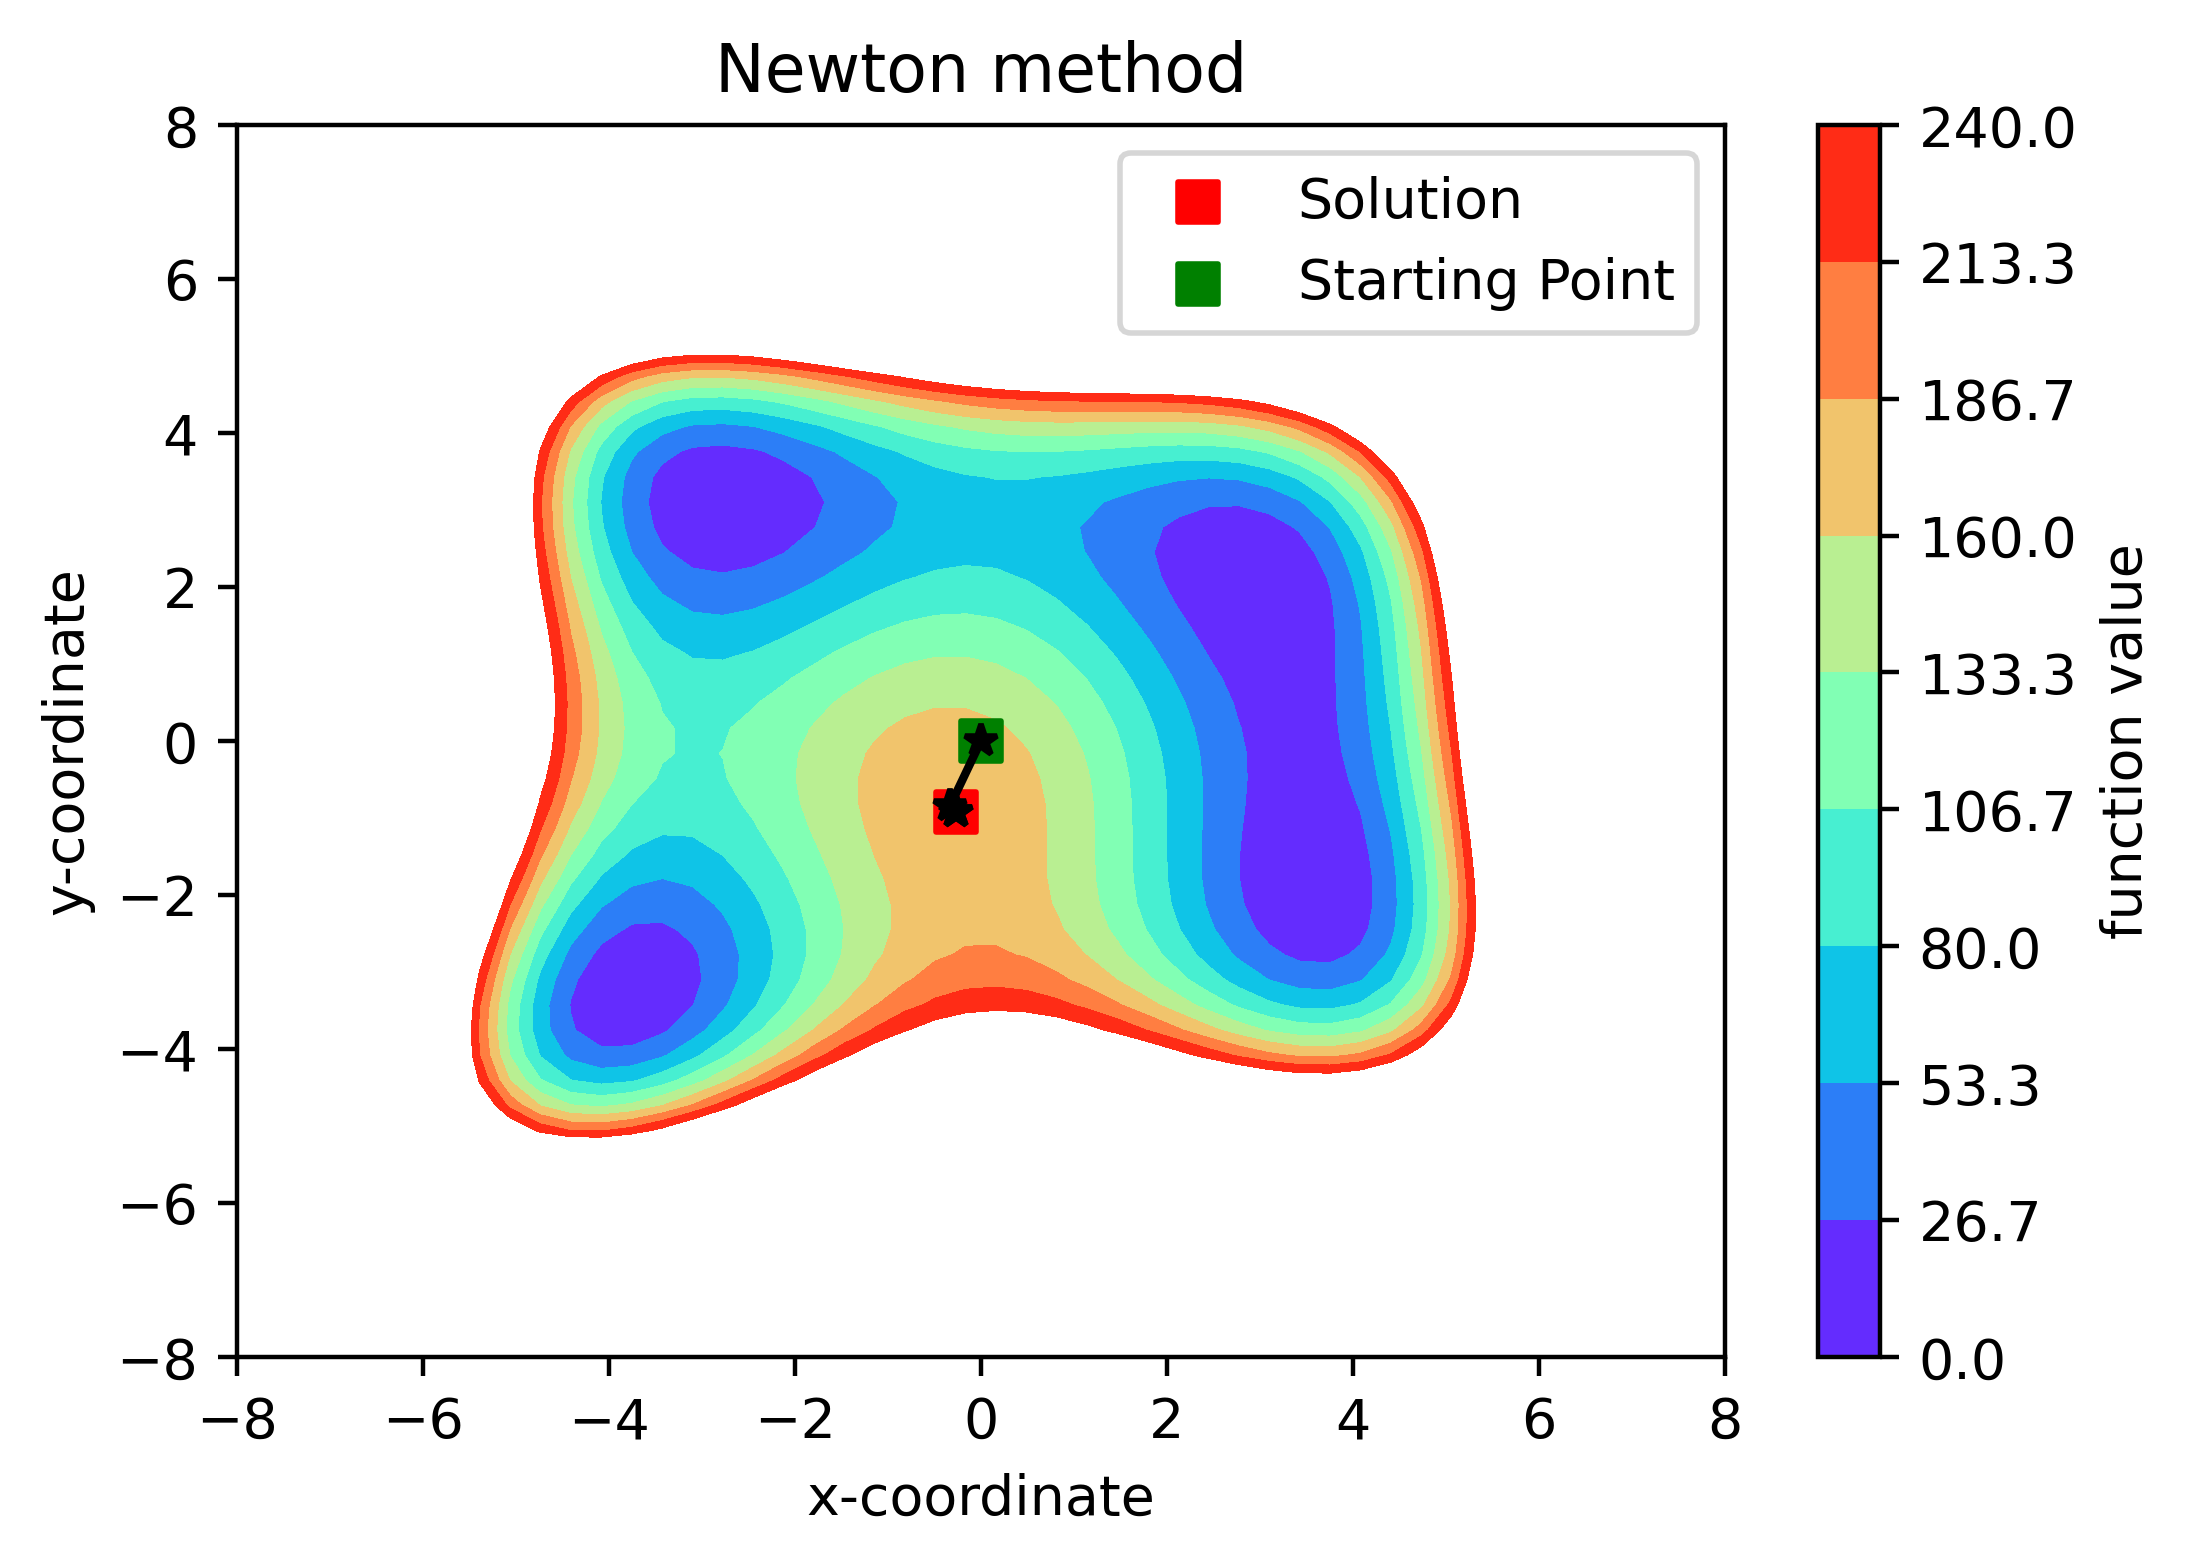

In [14]:
f,g,H = tf.test_function(2)[:3]
x0 = np.array([[0, 0]])

print(f'Eigenvalues: {np.linalg.eigvals(H(x0))}')
x_opt, x_steps, gc = newton(g, H, x0)


#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-8,8,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
#cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 24750, 10), cmap="rainbow")
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 240, 10), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Newton method')



combined_array = np.concatenate(x_steps, axis=0)

# Plot the search direction
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0,0], x_opt[0,1],marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0,0], x0[0,1],marker="s",label="Starting Point",s=50,color='green')

plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("iterations:",gc)


## Task 3 ( Levenberg-Marquardt method ) :

Write your markdown and latex here


Start Levenberg marquardt method
Eigenvalues: [-42. -26.]
Convergence reached!
Starting point at x = [[0 0]]
Optimum at x = [[ 3.58442834 -1.84812653]]
iterations: 10


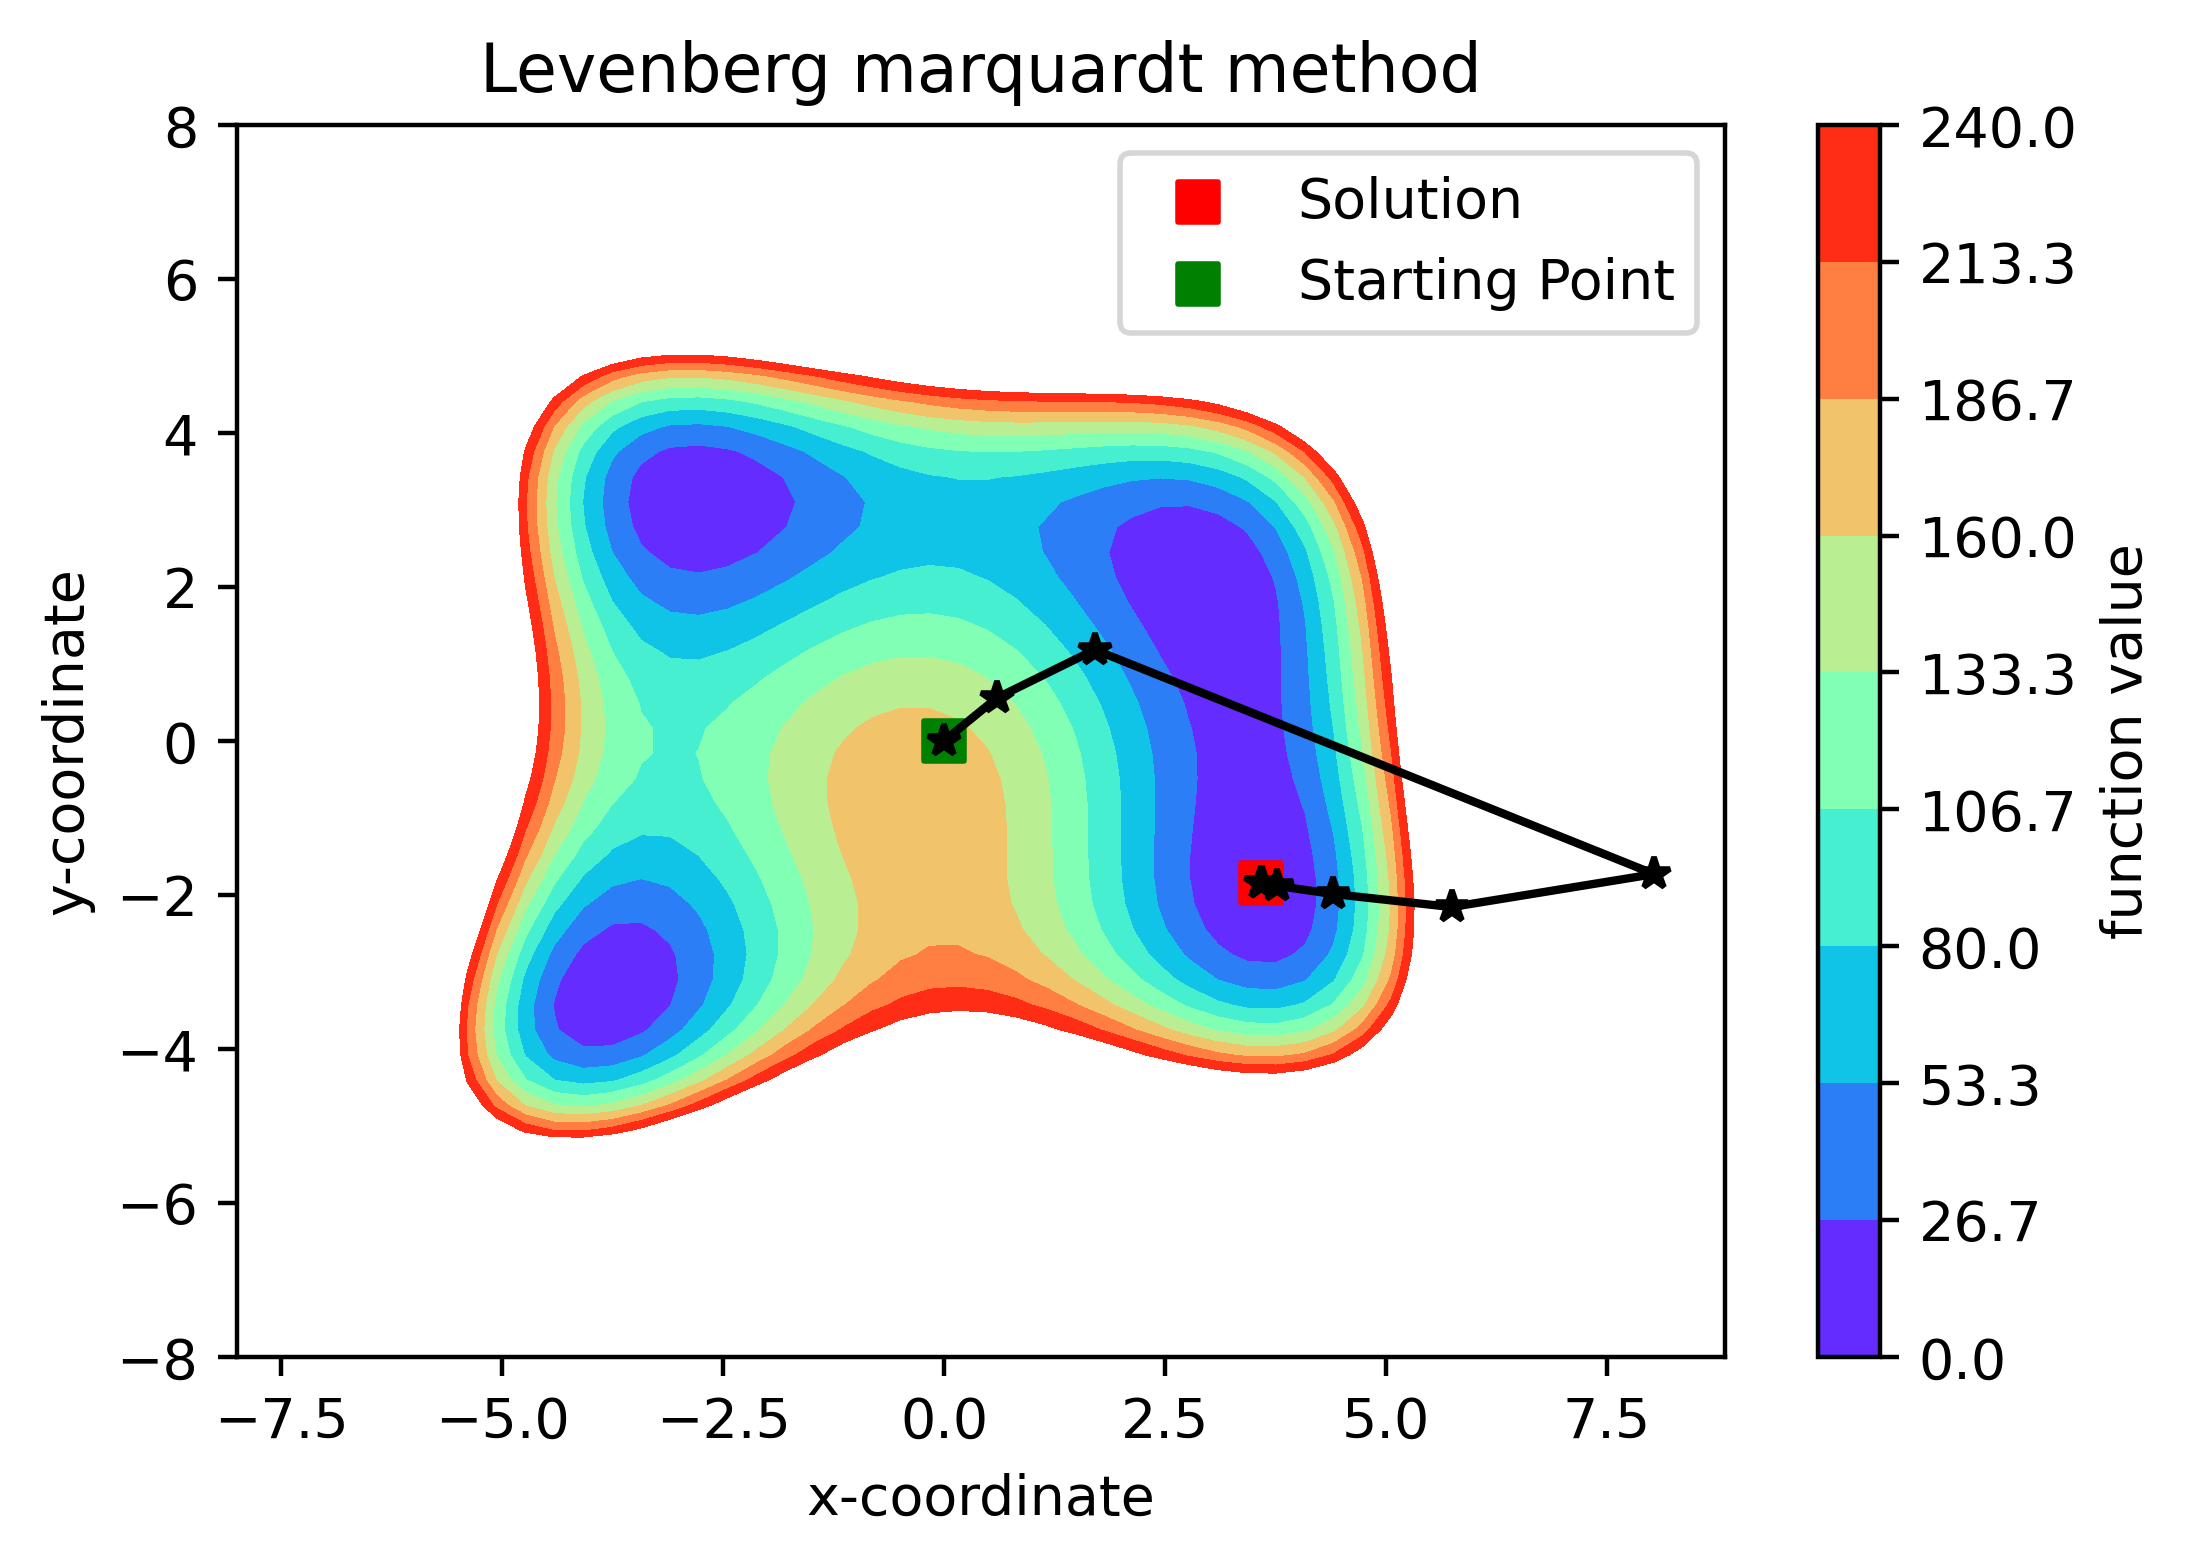

In [21]:
print('\nStart Levenberg marquardt method')
f,g,H = tf.test_function(2)[:3]

x0 = np.array([[0, 0]])

print(f'Eigenvalues: {np.linalg.eigvals(H(x0))}')
x_opt, x_steps, gc = levenberg_marquardt(g, H, x0)


#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-8,8,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
#cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 24750, 10), cmap="rainbow")
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 240, 10), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Levenberg marquardt method')


# Plot the search direction
combined_array = np.concatenate(x_steps, axis=0)
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0,0], x_opt[0,1],marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0,0], x0[0,1],marker="s",label="Starting Point",s=50,color='green')

plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("iterations:",gc)

## Task 4 ( Gauss-Newton method ) :


Write your markdown and latex here

In [26]:
import scipy.io as sio
import matplotlib.pyplot as plt

I = sio.loadmat("I_m.mat")["I_m"].T
f = np.logspace(1, 6, len(I))[:,None]

model = lambda x: np.abs(1/(x[0]+ 1j*((2*np.pi*f)*x[1]-1/((2*np.pi*f)*x[2]))))

#x0 = np.array([[0.5],[2e-3],[3e-6]]) # scaled values, R=x(0), L=x(1).10^-3, C=x(2).10^-6
x0 = np.array([[0.5],[0.2],[0.3]]) # non-scaled values

xs, xsteps, fc,x0 = gauss_newton(model, x0, np.abs(I), N_max=1_000, h = 1e-8)

fig, ax = plt.subplots(figsize=((9,7)), dpi = 500)
ax.scatter(f, abs(I),label='measurements, y', s = 80)
ax.set_xscale('log'); plt.xlabel('f');plt.ylabel('abs(I)'); plt.title('Resonance curve of a series reson')
ax.plot(f, model(x0),color="grey",label='model, F(x)', linewidth = 5, linestyle = '--')

for i in range(len(xsteps)):
    ax.plot(f, model(xsteps[i]),label=f'F(x) - iteration {i+1}')
ax.legend()
ax.set_ylim(ymax = 0.02, ymin = 0)

print("Starting point at x =", x0)
print("Optimum at x =", xs)
print("iterations:",fc)

LinAlgError: Singular matrix

In [ ]:
## Write your code here
